In [308]:
from pymongo import MongoClient

# Requires the PyMongo package.
# https://api.mongodb.com/python/current

client = MongoClient('mongodb://localhost:27017/')
filter={
    
}

result = client['mooc']['sample_cleaned'].find(
  filter=filter
)

results = list(result)

In [309]:
print( len(results) )
results


178508


[{'_id': ObjectId('682dc5dd26080dac37efd544'),
  'id': '52ef4b71ab137b00720007d4',
  'body': "Dans le cadre de mes études d'ingénieur j'ai été ammené à aborder la question du management de manière théorique. En poste depuis un peu plus d'un an maintenant, je souhaitais mettre à jour mes connaissances, les confronter aux situations professionnelles que j'ai rencontré. J'aimerais au terme de ce MOOC disposer de compétences manageriales en complément de mon expérience technique.\n\n",
  'created_at': '2014-02-03T07:55:29Z',
  'parent_id': '',
  'thread_id': '',
  'course_id': 'CNAM/01002/Trimestre_1_2014',
  'type': 'thread',
  'username': 'qb',
  'user_id': '281811',
  'courseware_title': 'Entre nous / Presentez-vous',
  'endorsed': False,
  'depth': ''},
 {'_id': ObjectId('682dc5dd26080dac37efd545'),
  'id': '52ef5f60919cec5e32000962',
  'body': "jeune ingénieur occupant le post d'un Project manager dans une multinational je me suis confronté à des situations  où ma connaissance théoriq

In [310]:
import pandas as pd
df = pd.DataFrame(results)
df.head()

,_id,id,body,created_at,parent_id,thread_id,course_id,type,username,user_id,courseware_title,endorsed,depth
0,682dc5dd26080dac37efd544,52ef4b71ab137b00720007d4,Dans le cadre de mes études d'ingénieur j'ai é...,2014-02-03T07:55:29Z,,,CNAM/01002/Trimestre_1_2014,thread,qb,281811,Entre nous / Presentez-vous,False,
1,682dc5dd26080dac37efd545,52ef5f60919cec5e32000962,jeune ingénieur occupant le post d'un Project ...,2014-02-03T09:20:32Z,,52ef4b71ab137b00720007d4,CNAM/01002/Trimestre_1_2014,comment,MountacirAmar,140372,,False,0
2,682dc5dd26080dac37efd546,52ef4d79b4907d2e23000996,"Bonjour,\nje suis actuellement une formation d...",2014-02-03T08:04:09Z,,,CNAM/01002/Trimestre_1_2014,thread,fidji,268092,Entre nous / Presentez-vous,False,
3,682dc5dd26080dac37efd547,52ef73945c4baf9e610008a8,"Bonjour, fondatrice du l’Institut Européen pou...",2014-02-03T10:46:44Z,,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,ElenaThomas,264453,,False,0
4,682dc5dd26080dac37efd548,52efa3b5cfc81d7e410009a3,"Répartir les taches, former ses collaborateurs...",2014-02-03T14:12:05Z,52ef73945c4baf9e610008a8,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,BEJA,134144,,False,1


In [311]:
df['username'].value_counts()

username
EGo41                   5948
                        4758
Vincent-de-Cherbourg     769
pigret                   759
nabla09                  692
                        ... 
rouvry                     1
Nobel01                    1
Anthony-Viste              1
FrancoisL44                1
lminguet                   1
Name: count, Length: 51454, dtype: int64

In [312]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at']

0        2014-02-03 07:55:29+00:00
1        2014-02-03 09:20:32+00:00
2        2014-02-03 08:04:09+00:00
3        2014-02-03 10:46:44+00:00
4        2014-02-03 14:12:05+00:00
                    ...           
178503   2022-06-23 18:56:10+00:00
178504   2022-06-25 17:37:11+00:00
178505   2022-06-26 14:34:08+00:00
178506   2022-06-26 18:03:34+00:00
178507   2022-06-28 08:17:43+00:00
Name: created_at, Length: 178508, dtype: datetime64[ns, UTC]

In [313]:
import datetime
import pytz
now = datetime.datetime.now(pytz.UTC)
print(now)
df['recency'] = (now - df['created_at']).dt.total_seconds().astype(int)
df['recency']
#garder le minimum pour la fin


2025-05-22 12:58:25.190224+00:00


0         356504576
1         356499473
2         356504056
3         356494301
4         356481980
            ...    
178503     91908135
178504     91740074
178505     91664657
178506     91652091
178507     91514442
Name: recency, Length: 178508, dtype: int64

In [314]:
df

,_id,id,body,created_at,parent_id,thread_id,course_id,type,username,user_id,courseware_title,endorsed,depth,recency
0,682dc5dd26080dac37efd544,52ef4b71ab137b00720007d4,Dans le cadre de mes études d'ingénieur j'ai é...,2014-02-03 07:55:29+00:00,,,CNAM/01002/Trimestre_1_2014,thread,qb,281811,Entre nous / Presentez-vous,False,,356504576
1,682dc5dd26080dac37efd545,52ef5f60919cec5e32000962,jeune ingénieur occupant le post d'un Project ...,2014-02-03 09:20:32+00:00,,52ef4b71ab137b00720007d4,CNAM/01002/Trimestre_1_2014,comment,MountacirAmar,140372,,False,0,356499473
2,682dc5dd26080dac37efd546,52ef4d79b4907d2e23000996,"Bonjour,\nje suis actuellement une formation d...",2014-02-03 08:04:09+00:00,,,CNAM/01002/Trimestre_1_2014,thread,fidji,268092,Entre nous / Presentez-vous,False,,356504056
3,682dc5dd26080dac37efd547,52ef73945c4baf9e610008a8,"Bonjour, fondatrice du l’Institut Européen pou...",2014-02-03 10:46:44+00:00,,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,ElenaThomas,264453,,False,0,356494301
4,682dc5dd26080dac37efd548,52efa3b5cfc81d7e410009a3,"Répartir les taches, former ses collaborateurs...",2014-02-03 14:12:05+00:00,52ef73945c4baf9e610008a8,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,BEJA,134144,,False,1,356481980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178503,682dd0ea26080dac37f28e8b,62b4b74a39ed9e0001000082,"Bonjour, \nEt à quoi sert la ligne 2 alors, q...",2022-06-23 18:56:10+00:00,,62b431ef84854e0001000044,course-v1:MinesTelecom+04017+session12,comment,EGo41,71110,,False,0,91908135
178504,682dd0ea26080dac37f28e8c,62b747c7d8cfb40001000065,Je n'est pas compris la carte .\nJe suis dans ...,2022-06-25 17:37:11+00:00,,,course-v1:MinesTelecom+04026+session10,thread,andeffofossi,20769732,Semaine 1 / Les objets et projets des FabLabs,False,,91740074
178505,682dd0ea26080dac37f28e8d,62b86e6084854e000100005a,"Bonjour, je n'arrive pas à avoir le texte du T...",2022-06-26 14:34:08+00:00,,,course-v1:MinesTelecom+04026+session10,thread,,,Semaine 3 / TP - Task grader,False,,91664657
178506,682dd0ea26080dac37f28e8e,62b89f768cfc560001000065,https://www.tinkercad.com/things/8XFiMDO5GfY,2022-06-26 18:03:34+00:00,,,course-v1:MinesTelecom+04021+session12,thread,ClemGamer,19499896,Semaine 2 / Partagez vos modélisations Tinkercad,False,,91652091


In [315]:
df['user_id'].value_counts().to_dict()

{'71110': 5948,
 '': 4758,
 '48133': 769,
 '1715116': 759,
 '3431977': 692,
 '221955': 645,
 '7534119': 622,
 '149663': 601,
 '803086': 534,
 '36082': 499,
 '186993': 438,
 '2624006': 401,
 '3791691': 390,
 '1316834': 385,
 '1685520': 361,
 '935202': 358,
 '211101': 355,
 '37558': 341,
 '1177590': 338,
 '3176093': 323,
 '17055242': 321,
 '3421333': 319,
 '117196': 313,
 '1342814': 287,
 '236904': 285,
 '1120323': 275,
 '596250': 273,
 '3776922': 259,
 '2988860': 250,
 '186384': 242,
 '5644262': 238,
 '6135382': 237,
 '687522': 236,
 '5477077': 235,
 '72361': 234,
 '11259502': 226,
 '2493253': 219,
 '2536154': 218,
 '19642346': 215,
 '4948256': 209,
 '1595340': 198,
 '5114092': 192,
 '5248': 191,
 '2709405': 190,
 '577980': 188,
 '3508935': 185,
 '2647148': 184,
 '1044681': 184,
 '436578': 179,
 '2623724': 179,
 '1161930': 173,
 '1519134': 172,
 '495369': 169,
 '648432': 166,
 '808042': 166,
 '6135784': 165,
 '509382': 165,
 '204360': 165,
 '935346': 163,
 '2987420': 162,
 '98905': 162,

In [316]:
from transformers import pipeline
pipe = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")




Device set to use cpu


In [ ]:
from langdetect import detect, LangDetectException

def detect_lang_safe(text):
    try:
        if isinstance(text, str) and text.strip():
            return detect(text)
        else:
            return "NA"
    except LangDetectException:
        return "NA"

df['lang'] = df['body'].apply(detect_lang_safe)
df = df[df['lang'] == 'fr']

In [318]:
df

,_id,id,body,created_at,parent_id,thread_id,course_id,type,username,user_id,courseware_title,endorsed,depth,recency,lang
0,682dc5dd26080dac37efd544,52ef4b71ab137b00720007d4,Dans le cadre de mes études d'ingénieur j'ai é...,2014-02-03 07:55:29+00:00,,,CNAM/01002/Trimestre_1_2014,thread,qb,281811,Entre nous / Presentez-vous,False,,356504576,fr
1,682dc5dd26080dac37efd545,52ef5f60919cec5e32000962,jeune ingénieur occupant le post d'un Project ...,2014-02-03 09:20:32+00:00,,52ef4b71ab137b00720007d4,CNAM/01002/Trimestre_1_2014,comment,MountacirAmar,140372,,False,0,356499473,fr
2,682dc5dd26080dac37efd546,52ef4d79b4907d2e23000996,"Bonjour,\nje suis actuellement une formation d...",2014-02-03 08:04:09+00:00,,,CNAM/01002/Trimestre_1_2014,thread,fidji,268092,Entre nous / Presentez-vous,False,,356504056,fr
3,682dc5dd26080dac37efd547,52ef73945c4baf9e610008a8,"Bonjour, fondatrice du l’Institut Européen pou...",2014-02-03 10:46:44+00:00,,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,ElenaThomas,264453,,False,0,356494301,fr
4,682dc5dd26080dac37efd548,52efa3b5cfc81d7e410009a3,"Répartir les taches, former ses collaborateurs...",2014-02-03 14:12:05+00:00,52ef73945c4baf9e610008a8,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,BEJA,134144,,False,1,356481980,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178502,682dd0ea26080dac37f28e8a,62b431ef84854e0001000044,J'ai trouvé moyen d'améliorer la fin du code. ...,2022-06-23 09:27:11+00:00,,,course-v1:MinesTelecom+04017+session12,thread,ClemGamer,19499896,Semaine 2 / Les capteurs,False,,91942274,fr
178503,682dd0ea26080dac37f28e8b,62b4b74a39ed9e0001000082,"Bonjour, \nEt à quoi sert la ligne 2 alors, q...",2022-06-23 18:56:10+00:00,,62b431ef84854e0001000044,course-v1:MinesTelecom+04017+session12,comment,EGo41,71110,,False,0,91908135,fr
178504,682dd0ea26080dac37f28e8c,62b747c7d8cfb40001000065,Je n'est pas compris la carte .\nJe suis dans ...,2022-06-25 17:37:11+00:00,,,course-v1:MinesTelecom+04026+session10,thread,andeffofossi,20769732,Semaine 1 / Les objets et projets des FabLabs,False,,91740074,fr
178505,682dd0ea26080dac37f28e8d,62b86e6084854e000100005a,"Bonjour, je n'arrive pas à avoir le texte du T...",2022-06-26 14:34:08+00:00,,,course-v1:MinesTelecom+04026+session10,thread,,,Semaine 3 / TP - Task grader,False,,91664657,fr


In [319]:
def classify_sentiment(text):
    max_len = 512
    if len(text) > max_len:
        text = text[:max_len]
    # Classify a new sentence

    sentence = text
    result = pipe(sentence)
    return result[0]['score']
    # print(result[0]['label'])

from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

# Créer UNE instance globale
analyzer = SentimentIntensityAnalyzer()

def classify_sentiment_label_fr(text):
    
    score = analyzer.polarity_scores(text)['compound']
    if score > 0.1:
        label = 0
    elif score < -0.1:
        label = 1
    else:
        label = 2
    return label

# Si tu veux juste le label ou le score :
df['sentiment'] = df['body'].apply(lambda x: classify_sentiment_label_fr(x))
# ou pour le score :
# df['sentiment_score'] = df['body'].apply(lambda x: classify_sentiment_label_fr(x)['score'])





C:\Users\p2972\AppData\Local\Temp\ipykernel_19896\861491446.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [320]:

df['sentiment'] = df['body'].apply(classify_sentiment_label_fr)

C:\Users\p2972\AppData\Local\Temp\ipykernel_19896\66107564.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [321]:
df['frequency'] = df.groupby('user_id')['user_id'].transform('count')
df

C:\Users\p2972\AppData\Local\Temp\ipykernel_19896\43696109.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,_id,id,body,created_at,parent_id,thread_id,course_id,type,username,user_id,courseware_title,endorsed,depth,recency,lang,sentiment,frequency
0,682dc5dd26080dac37efd544,52ef4b71ab137b00720007d4,Dans le cadre de mes études d'ingénieur j'ai é...,2014-02-03 07:55:29+00:00,,,CNAM/01002/Trimestre_1_2014,thread,qb,281811,Entre nous / Presentez-vous,False,,356504576,fr,1,1
1,682dc5dd26080dac37efd545,52ef5f60919cec5e32000962,jeune ingénieur occupant le post d'un Project ...,2014-02-03 09:20:32+00:00,,52ef4b71ab137b00720007d4,CNAM/01002/Trimestre_1_2014,comment,MountacirAmar,140372,,False,0,356499473,fr,1,1
2,682dc5dd26080dac37efd546,52ef4d79b4907d2e23000996,"Bonjour,\nje suis actuellement une formation d...",2014-02-03 08:04:09+00:00,,,CNAM/01002/Trimestre_1_2014,thread,fidji,268092,Entre nous / Presentez-vous,False,,356504056,fr,0,1
3,682dc5dd26080dac37efd547,52ef73945c4baf9e610008a8,"Bonjour, fondatrice du l’Institut Européen pou...",2014-02-03 10:46:44+00:00,,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,ElenaThomas,264453,,False,0,356494301,fr,0,4
4,682dc5dd26080dac37efd548,52efa3b5cfc81d7e410009a3,"Répartir les taches, former ses collaborateurs...",2014-02-03 14:12:05+00:00,52ef73945c4baf9e610008a8,52ef4d79b4907d2e23000996,CNAM/01002/Trimestre_1_2014,comment,BEJA,134144,,False,1,356481980,fr,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178502,682dd0ea26080dac37f28e8a,62b431ef84854e0001000044,J'ai trouvé moyen d'améliorer la fin du code. ...,2022-06-23 09:27:11+00:00,,,course-v1:MinesTelecom+04017+session12,thread,ClemGamer,19499896,Semaine 2 / Les capteurs,False,,91942274,fr,0,1
178503,682dd0ea26080dac37f28e8b,62b4b74a39ed9e0001000082,"Bonjour, \nEt à quoi sert la ligne 2 alors, q...",2022-06-23 18:56:10+00:00,,62b431ef84854e0001000044,course-v1:MinesTelecom+04017+session12,comment,EGo41,71110,,False,0,91908135,fr,2,5825
178504,682dd0ea26080dac37f28e8c,62b747c7d8cfb40001000065,Je n'est pas compris la carte .\nJe suis dans ...,2022-06-25 17:37:11+00:00,,,course-v1:MinesTelecom+04026+session10,thread,andeffofossi,20769732,Semaine 1 / Les objets et projets des FabLabs,False,,91740074,fr,0,1
178505,682dd0ea26080dac37f28e8d,62b86e6084854e000100005a,"Bonjour, je n'arrive pas à avoir le texte du T...",2022-06-26 14:34:08+00:00,,,course-v1:MinesTelecom+04026+session10,thread,,,Semaine 3 / TP - Task grader,False,,91664657,fr,0,3083


In [322]:
# from langdetect import detect, LangDetectException

# def detect_lang_safe(text):
#     try:
#         if isinstance(text, str) and text.strip():
#             return detect(text)
#         else:
#             return "NA"
#     except LangDetectException:
#         return "NA"

# df['lang'] = df['body'].apply(detect_lang_safe)

In [323]:
df.to_csv('sample_cleaned_checkpoint.csv', index=False)

In [324]:
df_cluster = df[['user_id', 'recency','frequency','lang', 'sentiment' ]]

# df_cluster = df_cluster.groupby('user_id').agg({
#     'recency': 'min',
#     'frequency': 'first',
    
# }).reset_index()



In [325]:
df_cluster2 = df_cluster.groupby('user_id').agg({
    'recency': 'min',
    'frequency': 'first',
    'lang': lambda x: x.mode()[0] if not x.mode().empty else "NA",
    'sentiment': lambda x: x.mode()[0] if not x.mode().empty else "NA",
}).reset_index()

df_cluster2


,user_id,recency,frequency,lang,sentiment
0,,91664657,3083,fr,0
1,1000,347835625,1,fr,2
2,1000197,252348632,1,fr,0
3,10002601,205978579,3,fr,0
4,1000263,228783802,1,fr,1
...,...,...,...,...,...
35081,99946,225500178,1,fr,0
35082,99958,257100295,1,fr,0
35083,999666,318743390,2,fr,0
35084,999768,319780925,10,fr,0


In [341]:
df_cluster2.shape

(35084, 9)

In [342]:
ids_to_remove = ['', '71110']
df_cluster2 = df_cluster2[~df_cluster2['user_id'].isin(ids_to_remove)]

In [345]:
df_cluster2[df_cluster2['user_id'].isin(ids_to_remove)]

,user_id,recency,frequency,lang,sentiment,lang_num,cluster,PCA1,PCA2


In [346]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



In [327]:
le = LabelEncoder()
df_cluster2['lang_num'] = le.fit_transform(df_cluster2['lang'])

In [347]:
df_cluster2

,user_id,recency,frequency,lang,sentiment,lang_num,cluster,PCA1,PCA2
1,1000,347835625,1,fr,2,0,0,-2.696059,0.800587
2,1000197,252348632,1,fr,0,0,1,0.000841,-0.529455
3,10002601,205978579,3,fr,0,0,1,0.558570,0.062579
4,1000263,228783802,1,fr,1,0,0,-0.543971,1.042264
5,1000269,235973967,1,fr,0,0,1,0.185382,-0.321248
...,...,...,...,...,...,...,...,...,...
35081,99946,225500178,1,fr,0,0,1,0.303420,-0.188072
35082,99958,257100295,1,fr,0,0,1,-0.052710,-0.589873
35083,999666,318743390,2,fr,0,0,3,-0.729851,-1.372461
35084,999768,319780925,10,fr,0,0,3,-0.600971,-1.375931


In [348]:
features = [col for col in df_cluster2.columns if df_cluster2[col].dtype in ['float64', 'int64'] and col not in ['user_id']]  # adapte selon tes colonnes
X = df_cluster2[features].values


In [349]:
from sklearn.preprocessing import StandardScaler

features = [col for col in df_cluster2.columns if df_cluster2[col].dtype in ['float64', 'int64'] and col not in ['user_id', 'cluster', 'PCA1', 'PCA2']]
X = df_cluster2[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [350]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled)
df_cluster2['cluster'] = labels


In [332]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
df_cluster2['PCA1'], df_cluster2['PCA2'] = X_pca[:, 0], X_pca[:, 1]


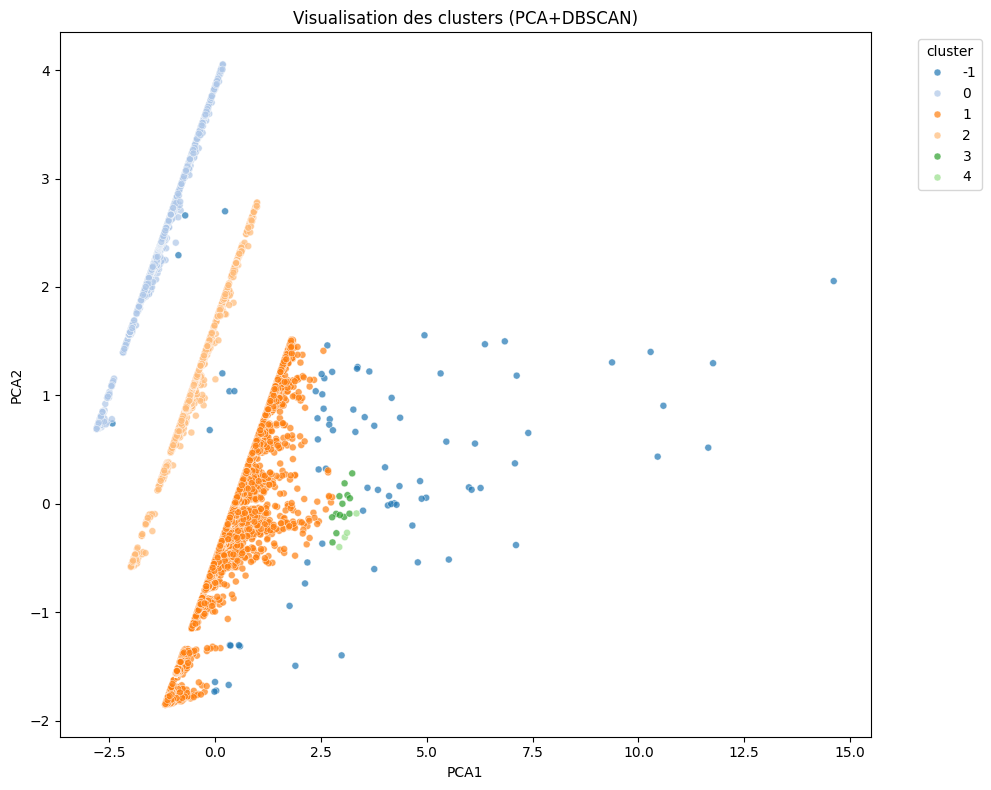

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='tab20',
    data=df_cluster2,
    legend='full',
    s=25, alpha=0.7
)
plt.title("Visualisation des clusters (PCA+DBSCAN)")
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.tight_layout()
plt.show()


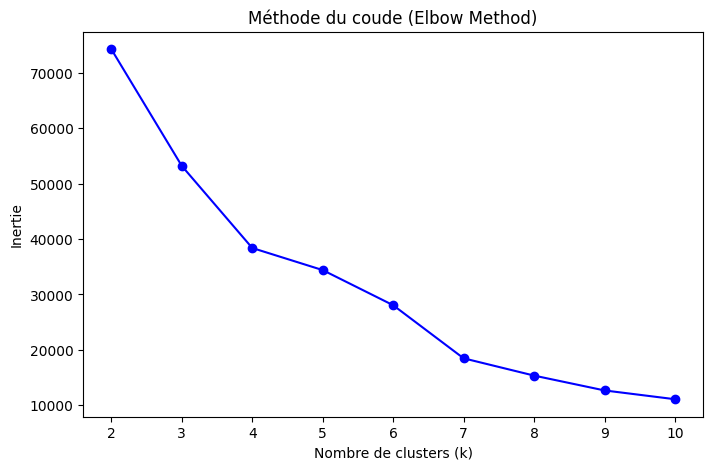

In [352]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = ['recency', 'frequency', 'lang_num', 'sentiment']
X = df_cluster2[features]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(2, 11)  # essaie de 2 à 10 clusters

for k in K_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'o-', color='blue')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude (Elbow Method)')
plt.show()


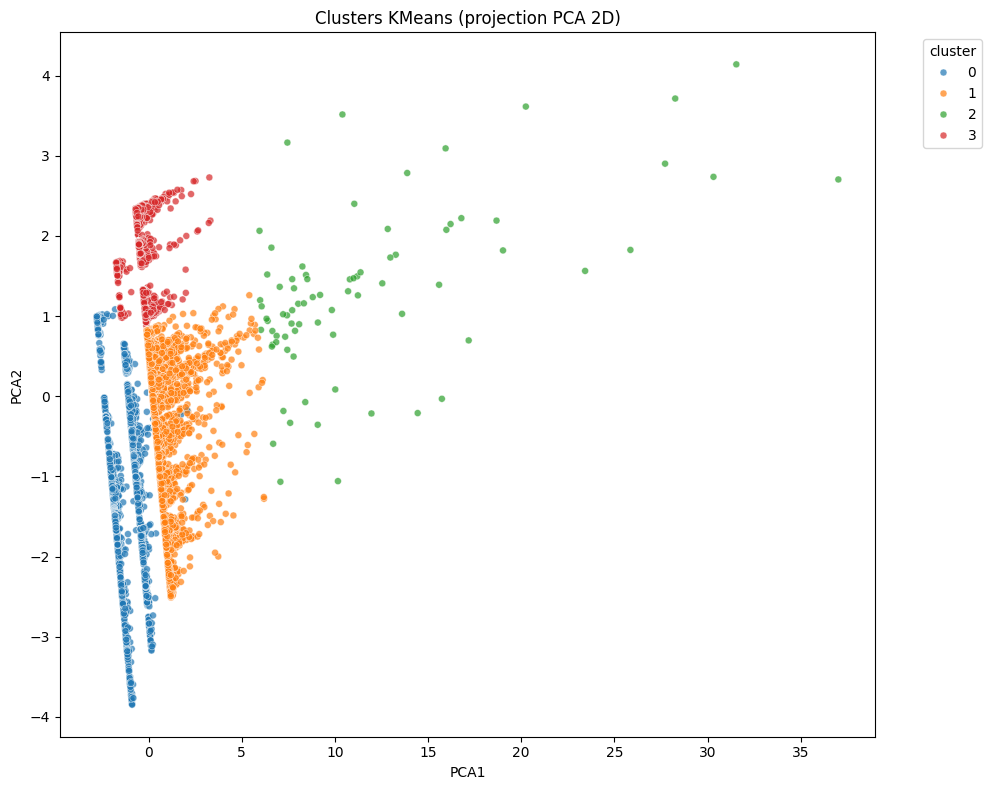

In [353]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sélectionne les colonnes numériques pertinentes
features = [col for col in df_cluster2.columns if df_cluster2[col].dtype in ['float64', 'int64'] and col not in ['user_id', 'cluster', 'PCA1', 'PCA2']]
X = df_cluster2[features].values

# 2. Standardise !
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Applique KMeans
k = 4  # Choisis le nombre de clusters que tu veux tester !
kmeans = KMeans(n_clusters=k, random_state=42)
df_cluster2['cluster'] = kmeans.fit_predict(X_scaled)

# 4. Réduction en 2D pour affichage
X_pca = PCA(n_components=2).fit_transform(X_scaled)
df_cluster2['PCA1'], df_cluster2['PCA2'] = X_pca[:, 0], X_pca[:, 1]

# 5. Scatterplot
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='cluster',
    palette='tab10',
    data=df_cluster2,
    legend='full',
    s=25, alpha=0.7
)
plt.title("Clusters KMeans (projection PCA 2D)")
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.tight_layout()
plt.show()


In [354]:
import plotly.express as px

# Ajoute les moyennes de chaque cluster dans une table si tu veux les exploiter aussi
cluster_means = df_cluster2.groupby('cluster')[features].mean().reset_index()

# Création du scatterplot interactif
fig = px.scatter(
    df_cluster2,
    x='PCA1',
    y='PCA2',
    color='cluster',
    hover_data=features + ['user_id'],   # Tu peux ajouter d'autres colonnes ici pour afficher dans le tooltip
    title="Clusters KMeans (projection PCA 2D - interactif)"
)

fig.write_html('clusters_kmeans_interactif.html')

hb scan

elbow methode